In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle 
import scipy.special as sp
import matplotlib.patches as patches
import seaborn as sns
from scipy import optimize
import math
%matplotlib inline

In [2]:
teta = 1

## $X_1, \dots, X_n \sim Beta(a, b)$, $\hat{\theta}_1  = (\hat{a}_1,\hat{b}_1)$  – ОМП, $ \hat{\theta}_2  = (\hat{a}_2,\hat{b}_2)$ – ОМС (Оценка методом спейсингов) . 1) Построить по выборке оценки $\hat{\theta}_1$ и $\hat{\theta}_2$ (найти численно).

In [3]:
arr = [5,10,20,50,100]

for n in arr:
    sample_1 = np.zeros(500)
    sample_2 = np.zeros(500)
    for i in range(500):
        x = sts.cauchy(loc=teta).rvs(n)
        def L(t):
            n = len(x)
            return -np.prod(1/(np.pi*(1+(x-t)**2)))
        sample_1[i] = optimize.differential_evolution(L, [(-5, 5)])['x']
        sample_2[i] = np.median(x)
    EX = np.mean(sample_1)
    EY = np.mean(sample_2)
    print('n =',n)
    print('EX =',EX,'EY =',EY)
    print('DX =',np.mean((sample_1-EX)**2),'DY =',np.mean((sample_2-EY)**2),end='\n\n')

n = 5
EX = 0.9553213414022912 EY = 1.0313763591687775
DX = 0.8042693403387638 DY = 1.5074305825853318

n = 10
EX = 0.9654813476111855 EY = 0.972558881657967
DX = 0.27829796081235303 DY = 0.36040826120984015

n = 20
EX = 0.9733812631355647 EY = 0.9778643752879957
DX = 0.11645112126864396 DY = 0.14372857311367856

n = 50
EX = 0.9954350009344878 EY = 0.9972683323630943
DX = 0.04526037084570158 DY = 0.05524432758427895

n = 100
EX = 1.0003705831028562 EY = 1.0036836709892938
DX = 0.02127301478376018 DY = 0.025498352651493996



n = 5
EX = 1.9996358417865832 EY = 1.8386221512598453
DX = 0.17467310913167103 DY = 0.18464589447300545



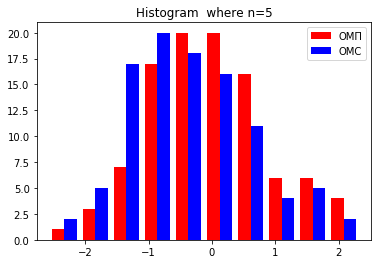

n = 7
EX = 1.9658669991472477 EY = 1.8165027049272686
DX = 0.14081621048360554 DY = 0.13935187877857483



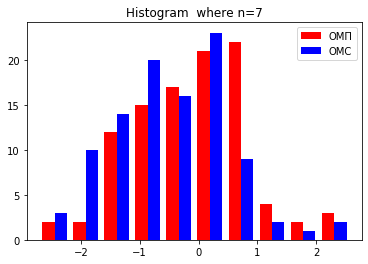

n = 10
EX = 1.9824243335231868 EY = 1.8511787413831495
DX = 0.061110583715029705 DY = 0.06314987193982055



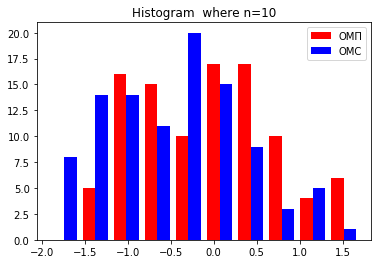

In [8]:
arr = [5,7,10]
teta = 2
for n in arr:
    sample_1 = np.zeros(100, dtype=np.float64)
    sample_2 = np.zeros(100, dtype=np.float64)
    for i in range(100):
        x = sts.norm(loc=teta,scale=1).rvs(n)
        def L(t):
            return -np.prod(np.exp(-(x-t)**2/2)/((2*np.pi)**0.5))
        def D(t):
            F = np.zeros(n,dtype=np.float64)
            for i in range(n):
                F[i] = sts.norm(loc = t).cdf(x[i])
            answer = F[0]
            for k in range(1,n-1):
                answer*=F[k]-F[k-1]
            answer *=1-F[n-1]
            return -answer
        sample_1[i] = optimize.differential_evolution(L, [(-5, 5)])['x']
        x.sort()
        sample_2[i] = optimize.differential_evolution(D, [(-5, 5)])['x']
    EX = np.mean(sample_1)
    EY = np.mean(sample_2)
    print('n =',n)
    print('EX =',EX,'EY =',EY)
    print('DX =',np.mean((sample_1-EX)**2),'DY =',np.mean((sample_2-EY)**2),end='\n\n')
    plt.hist([(sample_1-teta)*n**0.5,(sample_2-teta)*n**0.5],color=['r','b'], label = ['ОМП','ОМС'])
    plt.title('Histogram  where n={}'.format(n))
    plt.legend()
    plt.show()


##   $X_1, \dots, X_n \sim Gamma(a, b)$, $\hat{\theta}_1  = (\hat{a}_1,\hat{b}_1)$  – ОМП, $ \hat{\theta}_2  = (\hat{a}_2,\hat{b}_2)$ – ОМС (Оценка методом спейсингов) . 1) Построить по выборке оценки $\hat{\theta}_1$ и $\hat{\theta}_2$ (найти численно).

## Сравнить, какая из оценок $\hat{\theta}_1$ и $\hat{\theta}_2$ чаще оказывается ближе к θ при разных n, смоделировав для этого по 250 реализаций (для каждого n).

In [35]:
arr = [5,10,15]

a,b =  5, 3 

for n in arr:
    sample_1 = np.zeros((250,2))
    sample_2 = np.zeros((250,2))
    for i in range(250):
        x = sts.gamma(a,scale=b).rvs(n)
        def L(k):
            n = len(x)
            return -np.prod(sts.gamma(k[0],scale=k[1]).pdf(x))
        sample_1[i] = optimize.differential_evolution(L, [(0, 6),(0,6)])['x']
        def D(k):
            F = np.zeros(n,dtype=np.float64)
            for i in range(n):
                F[i] = sts.gamma(k[0],scale=k[1]).cdf(x[i])
            answer = F[0]
            for k in range(1,n-1):
                answer*=F[k]-F[k-1]
            answer *=1-F[n-1]
            return -answer
        x.sort()
        sample_2[i] = optimize.differential_evolution(D, [(0, 6),(0,6)])['x']
        
    EX_a = np.mean(sample_1[:,0])
    EX_b = np.mean(sample_1[:,1])
    
    print('n =',n)
    print('OMП')
    print('EX_a =',EX_a,'EX_b = ' ,EX_b)
    print('DX_a =',np.mean((sample_1[:,0]-EX_a)**2),'DX_b =',np.mean((sample_1[:,1]-EX_b)**2))
    EX_a = np.mean(sample_2[:,0])
    EX_b = np.mean(sample_2[:,1])
    print('\nOMС')
    print('EX_a =',EX_a,'EX_b = ' ,EX_b)
    print('DX_a =',np.mean((sample_2[:,0]-EX_a)**2),'DX_b =',np.mean((sample_2[:,1]-EX_b)**2))

n = 5
OMП
EX_a = 5.272610150774118 EX_b =  3.0429317888430405
DX_a = 1.313112691046259 DX_b = 1.300762306823859

OMС
EX_a = 3.542092209768814 EX_b =  4.585517046695217
DX_a = 1.9906492357299594 DX_b = 2.1062221797807843
n = 10
OMП
EX_a = 5.083164175765359 EX_b =  3.1129747107884715
DX_a = 1.0698242658595967 DX_b = 0.8324750245300547

OMС
EX_a = 4.020508960057461 EX_b =  4.012910310013904
DX_a = 1.7363701851834625 DX_b = 1.750420136110244
n = 15
OMП
EX_a = 5.068606667760061 EX_b =  3.0946217187738294
DX_a = 1.0447208536504013 DX_b = 0.8011205722635694

OMС
EX_a = 4.310175915430124 EX_b =  3.661315201790332
DX_a = 1.5159145999898167 DX_b = 1.3450226048933234


## Построить гистограммы для $\sqrt{n}(\hat{\theta}_i - \theta)$ на одном графике

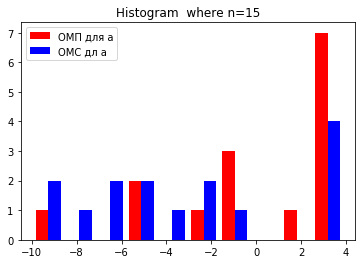

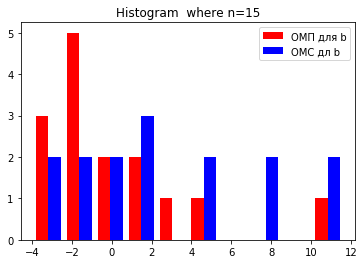

In [40]:
n  = 15
sample_1 = np.zeros((15,2))
sample_2 = np.zeros((15,2))
for i in range(15):
    x = sts.gamma(a,scale=b).rvs(n)
    def L(k):
        n = len(x)
        return -np.prod(sts.gamma(k[0],scale=k[1]).pdf(x))
    sample_1[i] = optimize.differential_evolution(L, [(0, 6),(0,6)])['x']
    def D(k):
        F = np.zeros(n,dtype=np.float64)
        for i in range(n):
            F[i] = sts.gamma(k[0],scale=k[1]).cdf(x[i])
        answer = F[0]
        for k in range(1,n-1):
             answer*=F[k]-F[k-1]
        answer *=1-F[n-1]
        return -answer
    x.sort()
    sample_2[i] = optimize.differential_evolution(D, [(0, 6),(0,6)])['x']
plt.hist([(sample_1[:,0]-a)*n**0.5,(sample_2[:,0]-a)*n**0.5],color=['r','b'], label = ['ОМП для а','ОМС дл а'])
plt.title('Histogram  where n={}'.format(n))
plt.legend()
plt.show()
plt.hist([(sample_1[:,1]-b)*n**0.5,(sample_2[:,1]-b)*n**0.5],color=['r','b'], label = ['ОМП для b','ОМС дл b'])
plt.title('Histogram  where n={}'.format(n))
plt.legend()
plt.show()

## $X_1, \dots , X_n$ – выборка из распределения, являющегося смесью $N (\theta, exp(\theta - 2))$ и $N(0, 1)$ c весами 1/2, 1/2. Построить график функции правдоподобия.

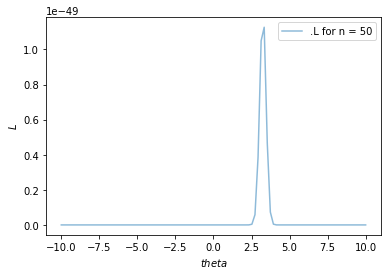

In [4]:
teta =3
def L(teta,x):
    return np.prod(sts.norm(loc = teta,scale = (1+np.exp(teta**(-2)))**0.5).pdf(x))
n = 50
y = np.zeros(100)
x = sts.norm(loc = teta,scale = (1+np.exp(teta**(-2)))**0.5).rvs(n)
t = np.linspace(-10,10,100)
y = list(map(lambda t: L(t, x),t))
plt.plot(t, y, label='.L for n = {}'.format(n), alpha=0.5)
plt.ylabel('$L$')
plt.xlabel('$theta$')
plt.legend(loc = 'best')
plt.show()

## Сделать тоже самое для случая, когда плотность распределения $X_i$ равна взвешенной сумме плотностей $N(\theta, exp(e^{-\theta}))$ и $Gamma(5, 5)$ c весами 1/2, 1/2.

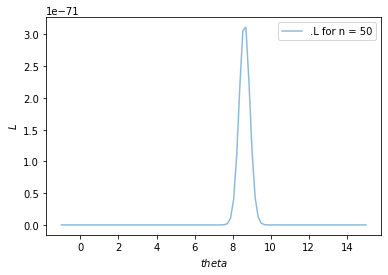

In [3]:
teta = 1
def L(teta,x):
    return np.prod(sts.norm(loc = teta,scale = (np.exp(np.exp(-teta)))**0.5).pdf(x)/2 + sts.gamma(5,scale=5).pdf(x)/2)
n = 50
y = np.zeros(100)
x = sts.norm(loc = teta,scale = np.exp(np.exp(-teta))**0.5).rvs(n)/2 + sts.gamma(5,scale=5).rvs(n)/2
t = np.linspace(-1,15,100)

y = list(map(lambda t: L(t, x),t))
plt.plot(t, y, label='.L for n = {}'.format(n), alpha=0.5)
plt.ylabel('$L$')
plt.xlabel('$theta$')
plt.legend(loc = 'best')
plt.show()